<a href="https://colab.research.google.com/github/RSIHLABS/ABACUS-R/blob/main/Json_for_Chemicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install --upgrade --user google-cloud-aiplatform







In [4]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Define project information
    PROJECT_ID = "proteinaitest"  # @param {type:"string"}
    LOCATION = "us-central1"  # @param {type:"string"}

    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user(project_id= PROJECT_ID)

    import os
    import base64
    import json
    import google.auth
    from google.cloud import aiplatform
    import vertexai

    vertexai.init(project="proteinaitest", location="us-central1")

    from vertexai.preview.vision_models import ImageGenerationModel

    from vertexai.preview.generative_models import (
        GenerationConfig,
        GenerativeModel,
        Image,
        Content,
        Part,
        HarmCategory,
        HarmBlockThreshold,
        ChatSession,
    )

    model = GenerativeModel(
    "gemini-1.5-flash-001",
  )
    multimodal_model = GenerativeModel("gemini-1.5-pro-preview-0409")
    generation_model = ImageGenerationModel.from_pretrained("imagegeneration")

import http.client
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)

def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(" ", "%20")
    return url

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

def submit_prompt(contents: list):
    # request and print Gemini
    print("\n-------Prompt--------")
    print_multimodal_prompt(contents)
    print("\n-------Response--------")
    print(multimodal_model.generate_content(contents).text)

# image generation helper functions
import math
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

def multiturn_generate_content():
  vertexai.init(project="proteinaitest", location="us-central1")

  chat = model.start_chat()
  print(chat.send_message(
      ["""Tell me a joke"""],
      generation_config=generation_config,
      safety_settings=safety_settings
  ))


generation_config = {
    "max_output_tokens": 8192,
    "temperature": 1,
    "top_p": 0.95,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

multiturn_generate_content()



candidates {
  content {
    role: "model"
    parts {
      text: "Why don\'t scientists trust atoms? \n\nBecause they make up everything! \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.32348695397377014
    severity: HARM_SEVERITY_LOW
    severity_score: 0.26664361357688904
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.2356356382369995
    severity: HARM_SEVERITY_LOW
    severity_score: 0.25645938515663147
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.40703877806663513
    severity: HARM_SEVERITY_LOW
    severity_score: 0.21983955800533295
  }
  safety_ratings {
    category: HARM_CATEGORY_SEXUALLY_EXPLICIT
    probability: NEGLIGIBLE
    probability_score: 0.04760265722870827
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.06681

In [5]:
chat = model.start_chat()
print(chat.send_message(
      ["""Tell me a story"""],
      generation_config=generation_config,
      safety_settings=safety_settings
  ))


candidates {
  content {
    role: "model"
    parts {
      text: "The old lighthouse keeper, Silas, lived a life of solitude. The only company he had was the relentless roar of the waves crashing against the rocky shore and the occasional squawk of a seagull. He had lived this way for decades, tending to the lighthouse, his only companion a loyal dog named Finn.\n\nOne stormy night, the wind howled like a banshee, and the rain lashed against the windows. Silas, his weathered face creased with worry, climbed the winding stairs to the top of the tower. The lantern pulsed, its beam slicing through the dense fog, a beacon of hope for any lost sailor. \n\nSuddenly, a loud bang echoed through the tower. Silas raced down the stairs, his heart pounding. At the foot of the stairs, he found Finn whimpering, his nose pointing towards the door. It was ajar, and a faint light flickered from beyond.\n\nSilas, his hand shaking, slowly opened the door. He gasped. A young woman, her clothes soaked an

In [3]:
# Initialize the model
model = GenerativeModel("gemini-1.5-flash-001")

# Start a chat session
chat = model.start_chat()

# Send a message
response = chat.send_message(["Tell me a joke"])
print(response)


NameError: name 'GenerativeModel' is not defined

In [6]:
response = chat.send_message("Tell me cat story")
print(response.text)

Bartholomew was not your average cat. He wasn't interested in chasing laser pointers or batting at dangling toys. No, Bartholomew was a cat of discerning tastes and refined sensibilities. His passion? Birdwatching. 

Bartholomew lived in a cozy cottage with a kindly old woman named Agnes. Every morning, Agnes would open the curtains, and Bartholomew would leap onto the windowsill, his emerald eyes fixed on the bustling world outside. 

His favorite spot was the gnarled oak tree in the garden, its branches laden with sparrows and finches. Bartholomew would spend hours perched on the windowsill, meticulously cataloging the feathered visitors. He had a keen eye for detail, noting the subtle differences in plumage, the calls, the flight patterns. He even kept a mental map of the bird's territories, meticulously plotting their movements.

One day, a new bird arrived in the garden. It was a vibrant blue jay, with a bold crest and a mischievous glint in its eye. Bartholomew was fascinated. He

Mounted at /content/drive
'Copy of Firsthumanface.jpg'				       mug.jpg
'Copy of Secondhumanface.jpg'				       Newcats
'Copy of Thirdhumanface.jpg'				      'Readingfile from Colab.ipynb'
'EarlyON Child and Family Centres Locations - geometry.json'   Sucrose_Hydrolase_5c9b2.result
 Humanfaces.ipynb					       Sucrose_Hydrolase_5c9b2.result.zip
 Insulin.json						       Untitled
'Json for Chemicals.ipynb'				       Untitled0.ipynb
 Maping.ipynb						       Untitled1.ipynb
 mug3.jpg						       Untitled2.ipynb
Mounted at /content/drive
1/1 [==============================] - 1s 624ms/step
I apologize, but I cannot access information from external files or file paths due to my current setup. As a text-based AI, I lack the capability to read data from outside my programmed boundaries. 

However, if you could describe the image or provide more information about its contents, I might be able to help you understand what it is. 

For example, you could tell me:

* What the subject of the imag

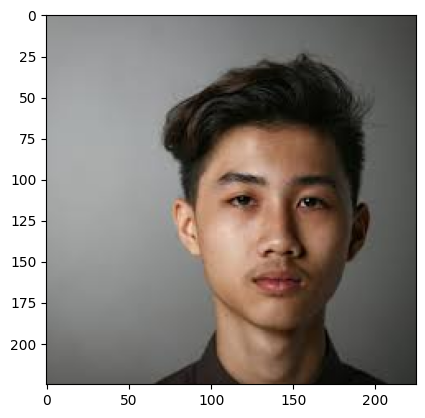

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

!ls "/content/drive/MyDrive/Colab Notebooks"

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Load the first image
img_path1 = '/content/drive/MyDrive/Colab Notebooks/Copy of Firsthumanface.jpg'
img1 = image.load_img(img_path1)
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the features of the first image
features1 = model.predict(x)

# Load the second image
img_path2 = '/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg'
img2 = image.load_img(img_path2)
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

plt.imshow(img1)

response = chat.send_message("what image is shown below in the file path img1")
print(response.text)



In [ ]:
response = chat.send_message("what image is shown below")
print(response.text)

I am sorry, but "above" is a relative notion. Depending on the context, your reference may imply a previous question or a different conversation thread where relevant pictures were involved. Without  a clear understanding and prior context, I, unfortunately, cannot answer or fulfill your request accurately within the boundaries of our interaction in 2023.

To illustrate, if you are wondering about the picture presented earlier this month before November 2023, then I shall share its description without delay. Or, if you ask during different conversation turns, I would require clear context to understand my cue more precisely:

1. Specifying the image by saying "the illustration previously described,"

2. Providing the date "the image on November xx, 2023," when the image was initially mentioned,

2. Using keywords or concepts related to the original image, such as "the cat with big green eyes."

However, if what you meant is referring to a picture we have never covered before now within

In [ ]:
import vertexai

from vertexai.generative_models import GenerativeModel, Part

# TODO(developer): Update and un-comment below line
# project_id = "PROJECT_ID"


vertexai.init(project="proteinaitest", location="us-central1")

model = GenerativeModel(model_name="gemini-1.5-flash-001")
from google.colab import files
uploaded = files.upload()

# Convert uploaded file and query into Content objects
content1 = Part(
    text=uploaded['Screenshot_20221111_...24 (1).png'].decode('utf-8'), # Assuming the file is a text file, replace 'utf-8' if necessary
    type_="image"
)
content2 = Part(
    text="what is this image?",
    type_="text"
)

# Query the model
response = model.generate_content([content1, content2])
print(response.text)


Saving Cat3.jpg to Cat3.jpg


KeyError: 'Screenshot_20221111_...24 (1).png'

In [ ]:
import vertexai

from vertexai.generative_models import GenerativeModel, Part

# TODO(developer): Update and un-comment below line
# project_id = "PROJECT_ID"

vertexai.init(project="project_id", location="us-central1")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


model = GenerativeModel(model_name="gemini-1.5-flash-001")

image_file = Part.from_uri(
    "/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg", "image/jpeg"
)

# Query the model
response = model.generate_content([image_file, "what is this image?"])
print(response.text)

Mounted at /content/drive


PermissionDenied: 403 Permission denied on resource project project_id. [links {
  description: "Google developers console"
  url: "https://console.developers.google.com"
}
, reason: "CONSUMER_INVALID"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/project_id"
}
metadata {
  key: "service"
  value: "aiplatform.googleapis.com"
}
]

In [ ]:
import vertexai

from vertexai.preview.language_models import TextEmbeddingModel
from vertexai.preview.language_models import ChatModel
from vertexai.preview.language_models import InputOutputTextPair
from vertexai.preview.language_models import ChatMessage

vertexai.init(project="proteinaitest", location="us-central1")

chat_model = ChatModel.from_pretrained("chat-bison@001")
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

from google.colab import drive
drive.mount("/content/drive", force_remount=True)


model = GenerativeModel(model_name="gemini-1.5-flash-001")


import base64

# Encode the image as base64
with open("/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create a Part object for the image
image_part = Part(
    data=encoded_string,
    type_="image"
)

# Create a Part object for the query
query_part = Part(
    text="What is in this image?",
    type_="text"
)

# Query the model
chat = chat_model.start_chat()
response = chat.send_message([image_part, query_part])
print(response.text)


Mounted at /content/drive


TypeError: Part.__init__() got an unexpected keyword argument 'data'

In [ ]:
POST https://{us-central1}-aiplatform.googleapis.com/v1/projects/{proteinaitest}/locations/{us-central1}/publishers/google/models/gemini-1.5-pro:streamGenerateContent
 {
  "contents": [
    {
      "role": string,
      "parts": [
        {
          // Union field data can be only one of the following:
          "text": string,
          "inlineData": {
            "mimeType": string,
            "data": string
          },
          "fileData": {
            "mimeType": string,
            "fileUri": string
          },
          // End of list of possible types for union field data.

          "videoMetadata": {
            "startOffset": {
              "seconds": integer,
              "nanos": integer
            },
            "endOffset": {
              "seconds": integer,
              "nanos": integer
            }
          }
        }
      ]
    }
  ],
  "systemInstruction": {
    "role": string,
    "parts": [
      {
        "text": string
      }
    ]
  },
  "tools": [
    {
      "functionDeclarations": [
        {
          "name": string,
          "description": string,
          "parameters": {
            object (OpenAPI Object Schema)
          }
        }
      ]
    }
  ],
  "safetySettings": [
    {
      "category": enum (HarmCategory),
      "threshold": enum (HarmBlockThreshold)
    }
  ],
  "generationConfig": {
    "temperature": number,
    "topP": number,
    "topK": number,
    "candidateCount": integer,
    "maxOutputTokens": integer,
    "presencePenalty": float,
    "frequencyPenalty": float,
    "stopSequences": [
      string
    ],
    "responseMimeType": string
  }
}
import vertexai

from vertexai.preview.language_models import TextEmbeddingModel
from vertexai.preview.language_models import ChatModel
from vertexai.preview.language_models import InputOutputTextPair
from vertexai.preview.language_models import ChatMessage

vertexai.init(project="proteinaitest", location="us-central1")

chat_model = ChatModel.from_pretrained("chat-bison@001")
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")



from google.colab import drive
drive.mount("/content/drive", force_remount=True)


model = GenerativeModel(model_name="gemini-1.5-flash-001")


import base64

# Encode the image as base64
with open("/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create a Part object for the image
# Use the 'text' argument to pass the encoded image data

# Assuming you have the image data in 'encoded_string'
image_part = Part(file_data=Content.from_bytes(encoded_string, type_="image/jpeg"))


# Create a Part object for the query
query_part = Part(
    text="What is in this image?",
    type_="text"
)

# Query the model
chat = chat_model.start_chat()
response = chat.send_message([image_part, query_part])
print(response.text)

SyntaxError: invalid syntax (<ipython-input-136-c760aa684d87>, line 1)

In [11]:
import io
from PIL import Image

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

def read_jpg_as_bytes(file_path: str) -> bytes:
    # Open the JPG image
    with Image.open(file_path) as img:
        # Save the image to a BytesIO buffer
        with io.BytesIO() as buff:
            img.save(buff, format="JPEG")
            buff.seek(0)
            jpg_bytes = buff.read()

    return jpg_bytes


# Example usage
jpg_file_path = "/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg"  # Replace with your actual file path
jpg_bytes = read_jpg_as_bytes(jpg_file_path)
# Now you can use 'jpg_bytes' as needed (e.g., send it to Gemini)

response = chat.send_message([jpg_bytes, "what image is shown?"])
print(response)




Mounted at /content/drive


TypeError: Unexpected item type: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf7\xbd\xf4\xbb\xea\x1f2\x945\x00N\x1a\x8c\xd4!\xa9\xd4\x01-\x15\x18jxj\x00Z*6eO\x9b\xf3\xf6\x1e\xb5\xe4\x1e:\xf8\xb3\xe5\xfd\xa3L\xf0\xd3\xfc\xff\x00v[\xfe\xa1;\x1d\x9d\x89\xff\x00h\xf0(\x03\xad\xf1\xb7\xc4\x1d?\xc2v\xfeL[n\xb5&\xfb\x96\xca\xdfw\xfd\xa6=\x87\xeb^\x13\xae\xf8\xbb[\xf14\xfb\xb5;\xd6h\x91\xbfw\x02\xf1\x1a\x1f]\xbd\xcf\xb9\xcde\x04\x96i7\xbb\xb3K+\x16ff\xc9\'\xa9$\x9e\xa7\xdc\xd3\x15?y\xfe\xdf?7\xff\x00^\x80\x1a\xe3\xf7\x9b\x1d\xff\x00\xde\xdb\xd7\x9e\xd4\xab\x16\xcd\xfb\xf7\'\xf7}\x7f\xfdU*\xc3\xb2=\xe9\xfe\xabp\xfb\xddMX\x11\xfe\xf3\xfd\x1d\x1b~\xef\x99\x9b\xd7\xdb\xd6\x80*\x00\xff\x00\xf0\x0f\xeft\xfa\xd2\x15O\x9f\xe4_\xf6~Z\xbfwn\x89\x1cS=\xc6\xe7_\xba\xbdP\x13\xda\xa1\x92\xdb\xf7n\xff\x00y\x1b\xfb\xcb\xed\xeb@\x14]\x1f\xef\xfd\xda\x84\xef\xad\t\x15\xfc\xbf\xdd?\xc9\xf7\xb6\xafJ\x87\xca\x7f\xe3M\xae\xdf\xedg<t\xa0\x08\x97\xfd\xca\xb3c}}\xa6]\xa5\xf6\x9fw,\x17\x0b\xf7d\x8d\xb0G\xb1\xf5\x1e\xc7\x8a\x85"\xfe\r\xfb_\xf5\xa7\x05\x95?\x8f\xfe\xfa\xfe\xb4\x01\xec>\x16\xf8\xd5\x0b\xc6\x96\x9e#\x87d\xbc/\xda\xe0\\\xa1\xf7e\xea\xa7\xe9\x9a\xf5\xab\x1dB\xd3S\xb4\x8a\xea\xc6\xe29\xed\xe4]\xc9$l\x085\xf2\x1f\x93\xbe=\xff\x00\xc6\xbf+V\xc7\x85|_\xa9\xf8N\xfb\xcd\xb4\x95\xbc\xa6o\xdf\xdb3~\xeea\xf4\xe8\xad\xfe\xd0\xa0\x0f\xab\xa8\xac\x0f\x0bx\xabN\xf1^\x95\xf6\xdd=\xfe\xef\xcb,-\xc3\xc6\xde\x84\x7f^\xf5\xbf@\x05\x14Q@\x05\x14Q@\x05\x14Q@\x05\x14Q@\x14\xa8\xa8\xa8\xcd\x00KNY*\x1d\xd4\xf0\xd4\x010jx5_5\xc5|O\xf1<\xba\x07\x86<\xab&_\xb6\xdfI\xe4E\xbb\xaa\x0c\x12\xec=\xc0\xe0\x1fS@\x1c\x87\xc5/\x1eK\x7fp\xfe\x1f\xd1\xae\x99-c\xca\xdd\xcf\x1bc\xcco\xee\x06\x1c\xe0w\xc7^\x95\xe6P\xdb\xbf\xf76\xff\x00\xb3\xfc\xaa\xf6\x91\xa7\xfd\xaa}\x9b7\xa7\xf1n\xff\x00\x1a\xe9m\xf4Kx~\x7f)\x7f\xcf\xb1\xa0\x0eb+)|\x8d\xff\x00\xde\xa9\x16\xc3\xce\x9e(\xbf\xfdH=>\xb5\xd3\xb5\xbc_\xe7\xa7\xe5ODD\xfe\x05Z\x00\xc9\x8fE\x7f#c\xff\x00\xadlm\xf4A\xda\xb4\xbf\xb0\xe2\xf26;\xb7\xca\xbbW\xfa\xd5\xf0\x1f\xef\xd2\xd0\x06<\xbaR|\x9b\xdf\xfd\xd5U\xe0\x0f\xebU\xdbH\xb7\xf2\xfew\x95\xb7\x7fy\xbd+nO\xf5u[m\x00fKan\xf1\xec\xd8\xdf\xddZ\xac\xda]\xbaI\xfc_/\xf0\xee\xcdi\xc8\xb5\x03P\x06k\xe9\xf6\xff\x00\xdc_\xf8\rB\xbad_s\xef\x7f\xbdZ/P\x83@\x14\xd3L\x7f\xb9\xbfo\xf7{\xd5\x0b\xcb_\'\xf87\x7f\xb4\xbd>\x95\xd2B\xd4\xfb\x8bt\xba\xb4t\xd9\xf3\xd0\x067\x85\xbcO\xa8xCYK\xdbWo+v\xdb\x98\x7f\x86E\xf7\x1e\xa3\xa8\xaf\xa9\xec\xae\xe2\xbd\xb1\xb7\xbb\x85\x83E4bEe\xe9\x823_#\xcb\x1f\xef\x1e\'v\xfb\xdbYw\x0e\xddk\xda~\t\xeb\xefu\xa4\xde\xe8\x97\x12\xef\xfb\x0c\x9b\xe0\xdd\xd4D\xdd\xbf\x06\xcf\xe7@\x1e\xb1E\x14P\x01E\x14P\x01E\x14P\x01E\x14P\x06m\x15_4\xff\x006\x80%\xa2\x98\xb2S\xe8\x01A\xaf\x01\xf8\x8f\xa8>\xb3\xe3\xd9b\xf9|\xabH\xc4\t\xf8\xf2\xdd\xfa\x9f_j\xf7k\xcb\x84\xb5\xb1\xb8\xb8\x7f\xb9\x14fON\x80\x9a\xf9\xaa\x0b\x97\xd45\x99o\x9d?\xd7\xc8\xd2\xb6\xefs\xc0\xf7\xe2\x80:\x8d"\xd1-m?\xdbo\xe5\xe9Wg\x93\xf7uZ)\x1d \xd9\xfd\xda&\x97\xf8?\xef\xaa\x00\x8d\x9a\x9f\x18\xfe?\xee\xd4\x18\xdf%]\x86/\xe9@\x13)\xfb\x95 _\xf6*\xcc\x16\xe9\xfd\xcf\xfb\xeb\xb5X\x16\xe8\xff\x00\'\xfe\x83\xd2\x802\xe5\x87\xf7\x7f\xec~u\t\x82\xb6\x9a\xdf\xfc\xb5B\xd0\x7f\xb1\xfe~\x94\x01\x87$\x15Y\xa2\xd9\xf7\xebfh?w\xf7+>h\xff\x00\xb8\x9b\xbe_\xca\x802g\x1f~\xaa\x83Z3\x8d\x95\x9e\xf4\x014Ur#\xf7\xeb9\x1feZ\x8aO\xdeP\x066\xa1\x06\xcb\xb7\xd8\x9f\xc5\xbb\xe6\xf7\xfe\x95{\xc1\xda\x9f\xf6\x07\x8dt\xdb\xd7\x99\xd2\xdd\xe4\x11\xcb\xb7\xa6\x1b\x8e}FqK\xa8\xc4\x8f\'\xfb\xcb\xb7\xebX\xd7J\xf0\xdaoO\xf5\xbb\x86\xdflt?\x9d\x00}p\x1e\x9d\x9a\xc2\xf0\xc6\xa1\xfd\xa1\xe1}6\xed\xdfs\xcbn\xac\xdf.9\xc75\xad\xb9(\x02\xc5\x15\x16iCP\x04\x94Sw-(4\x00\xb4QE\x00bQE\x14\x00S\x92M\x94\xda(\x03\x1b\xc7W_e\xf0N\xab/\xfd;\x95\xfb\xd8\xeb\xc7_\xc6\xbc#L\xb7\xfd\xdao\xfe\xef\xcb\xb7\xdb\x1c\x1a\xf6O\x89G\xfe(-C\xfd\xa6E\xfc\xd8W\x93\xd9\xaf\xdcO\xee\xe3\xeaO\xf9\xcd\x00l\xa1\xfd\xdf\xf9\xe6\xa0yi\xcd\'\xf7\x1e\xabG\xfeZ\x80,\xda\xfc\xfb\xdf\xe6\xff\x00f\xba\x0b\x0bO:?\x9f\xda\xb0\xad>O\xe3\xdd\xbb\xee\xd6\xfd\xa5\xdf\xee\xff\x00\xcfZ\x00\xd7\x8e\x1f\xdd\xd2\x18\xbfy\xf7>\xef\xe1RC\'\xfb\xb57\xfdu\xf9\xbf\xa5\x00U\xc7\xf7\xea\xbc\xc5\x13\xe4\xfe\xef\xdd\xecMh|\x9eg\xc9\xb7\xfc\xe6\xab]\xc4\x9e^\xf7\xff\x00\x80\xd0\x064\x92\x7fr\xb3nd\xd9%i\\+\xf9\x8f\xff\x00\xc4\xd6U\xd2K\xfd\xcf\xf6\xa8\x03&\xe9\xd3\xcc\xff\x00\xd0j\x83\xc9\xfe\xed\\\xba\x89\xff\x00\x8f\xfe\x05Y\x8f\xfe\xb1\xe8\x01\xd1\xc8\xe9V\xa2\x97\xf7\x95\x9eZ\xa5\x8eO\xeeP\x05\xdb\x8f\xdfAT%(\xff\x00\x7f\xeem\xf9\xaa\xef\xdf\xaa\xb8\xfe\xff\x00\xcb\xfd\xd6\xf5\x07\xaf\x14\x01\xec?\t/\xfc\xef\x04\xa5\xbe\xff\x00\x9e\xd2\xe1\xe2o\xa7\x04g\xf0?\xa5wa\xab\xca>\r\xce\x89\xfd\xbbi\xe7\x7f\xcbH\xa5UopA#\xf1\x15\xea\x80\xd0\x04\xc1\xa9\xc2J\x82\x974\x01dH\x94\xa1\xaa\xb0jxj\x00\xb3\xba\x8a\x83s\xd1@\x19~e\x1ef\xfa\x8e\x8a\x00\x99Z\x9dLY)\xf4\x01\xc8\xfcL\xd9\xff\x00\x08M\xc6\xff\x00\xf9\xed\x0f\xf0\xff\x00\xb6+\xcb\xe1\x8d\xfeDO\x97k}\xdf\xcf\xfaW\xaa\xfcD\x8b\x7f\x82o_\xfey22\xfagx\xeb^i\x14[#\xfe/\x9b\xfd\xaa\x00G\x93\xef\xd4Jw\xff\x00z\x9f \xdf\xfe})\x90\x0f;\xfe\x05@\x16!?\xdc\xdb\xfe\xd7\xadlX|\xff\x00\xf7\xd5S\xb3\xb2\xfd\xe7\xcf\xff\x00\x02\xad\xfd:\xc3\xf7\x9f\'\xff\x00\xae\x80/\xc0\x8f\xe5\xfd\xfa\xb6\xa3\xfb\xff\x00q~\xef\xbf\xb5M\x15\x96\xc8\xff\x00\xf4\x1f\xc2\xa5\x8e\x04\xfb\x9fy(\x02\xb9\x81<\xcd\xff\x00\xc6\xab\xb7\xdb\x9a\x86x\xebK\xca\xff\x00\xf6Z\xaaO\x07\xdfO\xfd\x0b\xdf\xff\x00\xd5@\x18\x17\x10\xbf\xf0\x7f\xc0\x7f\xadg\\\xc3\xfd\xfd\xbf{\xe5\xfc\xab\xa9\xfb>\xfd\xff\x00\'\xce\xbf\xe4\x1a\xab=\x92;\xff\x00\x0f\xfb?\xd6\x808k\xc8?\x82\xb2$\xb6\x7f\xe3\xf9k\xb3\xbf\x8a(c}\xef\xfe\xd7\xde\xed\\\xb5\xde\xa5h\x92:;\xed\xdb\xf9\x1a\x00\xcb\x96\x07J\x88+\xff\x00r\x91\xf5\xa8\x9f\xe7M\xbf\xedQ\x0e\xabn\xfb\xfc\xea\x00\xd0\x81\x9e\x92d\xdf"J\x9f\xee\xfd)b(\xff\x00<O\xf2\x7f*\xb5\x14[\xe3t\xfe:\x00\xe8\xfe\x13o\x87\xc4\x9a\x92o]\x8dj7/~\x1b\x8f\xa7^\x95\xeb\xa0\xd7\x93|5\xde\x9e(\xbdGM\xdb\xad~\xf7\x1c\x10\xc3\x83\xf9\x8a\xf5,\xd0\x05\x8c\xd3\xc4\xb5[{\xd3\x84\xb4\x01i_}:\xaa\x83NV\xd9@\x163EG\xe6Q@\x14\xa8\xa2\x8a\x00*Tj\x8a\x95h\x03#\xc6\xcb\xbf\xc1\xba\xaa\x7f\xd3\x1d\xdf\x91\x07\xfaW\x99a>\xc2\x8e\x9fq\x96\xbd+\xc5z\xbe\x9fe\xa3\\Z_\\<Os\x0b"\xaa\xaeO#\x19\xf6\x15\xe6\xd6\xd1:i1#\xbe\xed\xbf.\xef\xeb@\x156\x7f\xb7\xf7~\xf7\xa5S\x93SD\xf9"\xff\x00\x815\x1a\xe5\xcb\xa4in\x9f\xc5\xf3U\x1b=%\xdeM\xee\x9fw\xe6\xdd\xbb\x80}\xa8\x03A<O\xfb\xcd\x9b\xf6\xff\x00O^kR\xc7\xc6_e\x917\xbcL\x9b\xbe\xf7\'\xaf\xa7\xa7\xd6\xb1"\xf0\xb4\xaf\x03\xbf\xda\x1b\xcdf\xf9U\xbaz\xfeU\x03\xe8\xb2\xc3\xf2K\xff\x00}n\xcd\x00zu\xb7\x8aR\xea?\x9eX\x97\xa7\xcc\xad\xf2c\xeb[6:\x82M\x1f\x9a\xfb~_\xba\xdbx\xeb\xd8\x9a\xf2+[K\x7f3{\xba\xab\xff\x00\xbd\x91\x9f\xefs\xde\xba\xcd6\xe1!\xf9\xf7\xff\x00\xc0w\x1c\x1e?\xc6\x80;\x89%O\xe0\xff\x00\x80\xf7\xfcj\tn\xd1>\xfe\xdf\xee\xfd\xec\x7f\x93X\x9f\xda\x0e\xf1\xbf\xf7?\xcfz\x82k\xef\xdd\xfd\xcf\xbb\xf7~j\x00\xdck\xe4\x7f\x93\xee\xca\xbf\xc3\xdb\x9f\xe7Xz\xb6\xa6\xf6P}\xf6\xfb\xdf{\xbf\xd3\xda\xa9O\xa9\xec\x8f\xe7\x7f\x9f\xfb\xdfJ\xe7\xb5]i\x1f~\xfd\xac\xff\x00\x9e\x07J\x00\xc4\xd6uk\xb9\xa4wwfNv\xaf\xf2>\x86\xb9\xcf\xb3K4\xff\x00>\xed\xfb\xb7}\xecq\xf8w\xad\xb9\xef\xb7\xfd\xfd\xb1\'\xf9\xe2\xac[\xc5+\xc7\xe6\xa5\xa32\x7fzL ?\x9d\x00c\x7fdM\xf7\xdf\xfd\xe5\xdb\xda\x99-\xa7\xfb\xbf\xf0\x1a\xd7\x9fP\xf2~G\x8b\xff\x00\x1e\x1f\xd2\xa8\x1b\x9by\xa4\xfe\xeb\xb7\xf0\xf4\xff\x00&\x80,\xe8\xf2\xbc2l}\xdb?\xda\xef]\x1c\x03\xf7\x8f\xfd\xca\xe5\x16]\x9f\xee\x7f\xbd]>\x9b\'\x9d\x1cR\xff\x00\xb3\xb5\xa8\x01 \xf1\r\xc7\x87\xf5g\x96\xc7o\xda%\x87\xcbi$\\\xe1r;z\xfdk\xb6\xf07\x8e\xa5\xd75\'\xd2o\xa5\x8a[\xaf,\xc8\xb2*\xe3\xee\xf5\x07\x1cw\xaf/\xd5"y\xa7\xb8\xd9\xf7\xd7?\x90\xed[\x7f\x08U?\xe1/w\xd9\xff\x00.o\xb7\xf3\x1f\xfdz\x00\xf7?1)A\xa8(\x06\x80,\x03R\x87\xaa\xcb/\xf7\xeaJ\x00\xb1EW\xa2\x80\n*\x10\xd5(4\x00\xb4\xabIE\x00yo\xc4\xcbK\xb4\xf1%\x95\xc4R\xed\x8a{\x7f\x9a>\xc4\x83\x83\xfd+/N.\xf6.\x8f\xfc,+\xb3\xf8\x8df\xf3X\xd9]\xa7\xfc\xb0f\x8d\xbf\xe0X#\xf9\x1f\xce\xb9\x98\xd2/\xb2lOfo\xc6\x802\xee\x8ay\xff\x00q[o\xe9U\xda\xfa+X\xf7\xdcm\xd9\xfd\xefJ&\x81\xdew\xf9\xff\x00\x8a\xb2\xeft\xb9f\xf9<\xdf\x9f\xfeY\xb7a@\x1a/\xe2\x8f\xde\'\xfa\xa8\x11\xbf\x8av\xc6~\x83\xadQ\x9fW{\xabK\x8b\xbb\x17\xba\xbaH?\xd6\xc9\x1d\xa1\xf2\x93\xbfR\xd5c\xc3v\x9f\xd8z\x97\xdb\xae-\xe2\xd4\x7f\x87l\xff\x00\x7f\xfe\x00pB\x9f\xa84\xdf\xf8G\xb5\x88c\xbd\xb4\xd3/\x96\r>v-\xe44\x83.\x0f 6\x0e23\x8c\xfbP\x06$Z\xc3\xcd\xf3\xa4\xaa\xc9\xfe\xd4e\x08\xfe\x95\xb5g\xaa\xba\x7fyQ\xbf/\xce\xa5\xd1l\xe5\xd1\xb4\x9b\xdbO\xb2Z\xcf-\xcb|\xf2I\x97\xc0\x1f\xc2\x17\xfa\xe6\xb44\xcf\x0e\xbc1\xefw\x83c}\xe8\x15X\xe7\xd3\xa9\xc0\xa0\r}>g\x9bg\xcf\xf2qZ7\x16\xce\xf1\xfc\x9b\xf6\x7f{\xd6\xaai\xf6\xbfe\xf9?\xbb!\xdb\xbb\xd3\x8a\xea\xd6$\xfe\xcdw\xff\x00\xc7{\xd0\x07\x9bjL\xe9\xbf\xf8v\xd7\x1f=\xd3\xcd>\xc4\xf9\x9f\xfb\xdd\x87\xbf\xd2\xba\xcdu_\xcf\x97\xefVu\x8d\x84Iv\x92\xecYbf\xf9\x95\xba\x11\xd2\x80\x17\xc3\x1a\x12j\xd7\xd1\x7f\xa6\xc1f\x8c\xdb~\xdf6\x0e\x08\xe4\xachz\x9fsU\xbcEe\xfd\x93\xfd\xa1\xa4\xdd\xd8\xff\x00h\xdd}\xa3tZ\xb7\x98\xce\xe6>\xc0\x00v\x8f\xca\xbb[{;{h>KH\xa2\x7f\xf6W#\x8fc\xda\xaa\xde^#\xc7\xb3b\xff\x00\xdb5\x03\xf4\xa0\x0f7\xb0\xd2\xd3\xc8\x95\xee\xe2\x97\x7f\x1b>b0}i\x83M\xbb\xfe9w\x7f\xb2\xdd\xab\xa8\xb8)\xfc\x1b\xb7\xb7\xfb?\xd75\x02X\xca\xff\x00>\xcf\xfb\xeb4\x01\x95og\xfd\xfa\xe84s\xb3z}\x1a\xa9\xbc;*K)6O@\x0c\x9a\xfbf\xadw\x0b\xa2\xfc\xb3}\xefb?\xfa\xe6\xbao\x85zc\xa7\x885\x0b\xbf\xf9e\x04f5\xfa\xb1\xe0~U\xc7\xeb\x01\x13\xc4.\xe9\xff\x00-UY\x97\xdf\x1f\xfdj\xf6\x1f\x04X}\x8b\xc3qJ\xff\x00\xebn[\xcdo\xcb\x03\xf4\x14\x01\xd3\t)\xe0\xd44\x03@\x13\xd3\xd1\xb6TK%:\x80&\xf3\x12\x8a\x86\x8a\x00)\xcai\xb4P\x04\xe0\xd2\xd4H\x7f\x82\xa5\xa0\n\xf7\xb6I\xa8X\xcbi/\xdc\x95v\xfd\x0fc\xf8\x1a\xf3y-\xfe\xcd\x04\xa8\xe9\xb6X\xa41\xb2\xfb\x83\xfe\x15\xea\x00\xd7\x1f\xe3-1\xd3\xfe&q}\xc6_.\x7fc\xd9\xbf\xa7\xe5@\x1c\x18o\xdf\xec\xfe\nF\x8d\xdeG\xf9\x19\x93\xfd\xear/\xef?\xf4*\xd6\xb6\x8b\xf7{\xdf\xfb\xdf\xc3\xd6\x80(G\x13\xa4\x7f\xea\x9bg\xe1V\xd1\x7f\xde\xff\x00?J\xd6\xfb\x1e\xf9>\xe7\xfe;\xd6\xae\xdbi\x8f\xe6\x7f\xaaZ\x00\xcf\xb1\xd1\xbe\xd5">\xcd\xa9\xf7\xbf\xcf\xado\x9b+{X\xfeD\xf9\xff\x00\x87\xd2\xa7X\xbc\x98\xfe\x7f\x97\xfb\xb5\x0c\xec\x8f\xf2y\xbb\x7f\xbd\xfd\x7f\x1a\x00\xc5\x90\xec\x91\xe5O\xb8\xbfw\xfa\x9a\xd4k\xbd\x9aS\xff\x00\xb4\xbf\xc3Xr\xc8\xf3H\xe9o\xf3\xa2\xfe\x19\xad\x10\xaf\xf6O\xf66\xd0\x07\x11\xaa\xbaMw\xf3\xff\x00\x13U\x18\x0b\xda\xce\x9f\xc4\x8d\xfe\xd5o\xea\xfa[\xbc\x9b\xfeZ\xe7\xc4wi>\xcf+\xcd\xa0\x0e\xca\xda\xf3|\t\xbf\xe6\xfe\x1f\xbb\xd6\xab\xddi\xbb\xfe\xe2}\xec\xff\x00\xfa\xaa\x1d3S\x8a\x18\xd1%FW\xfe\xebWI\x0c\xf1\\\xec\xf9>\x7f\xfe\xb5\x00r\xcb\xa7\xdb\xa4\x9fss\xd4W0\xa3\xa7\xc8\x9b\x1e\xba\x89\xad\xa2}\xee\x9f}\x7f\xfdY\xack\xc4O\xfb\xe7\xe5\xff\x00\x1a\x00\xe5o"\xaajvIZw\x82\xb3\x08\xa0\r\x1b;\x04\xd5\xaf\xe2\xb7\xd9\xb9\xe5\xd8\xaa\xdd\xc7\'\'\xf2\x15\xec\xd1D\x90\xc6\x91\'\xdcU\xda\xbf\x85y\xcf\x80\xa1\xdf\xa9y\xaf\xff\x00,\xa1;~\xb9\xc7\xf5\xafC&\x80\'\xa2\xa1\rNY(\x02J\x95[}E@\xa0\t\xe8\xa6y\xa9E\x00>\x8a(\xa0\x02\xa6Y*\x1ar\x1a\x00\x9a\xa8\xeb\x91<\xde\x1f\xd4"\xfe\xf4\'\xf4\xe7\xfaU\xead\xcb\xbe\tS\xfb\xd1\x95\xfc\xc5\x00x\xd4\x7f\xeb\x12\xb6maO3\xfe\x03X\xf6\xe7g\xc8\xff\x00\xc3\x95\xfac\x8a\xda\xd3\x9bd\x9f\xf0\x1f\x95}=Nh\x03\xa4\xb2\xb4\xfd\xda\'\xdd\xdb\xf37RM]w\x86\xdb\xf8\xea\x8a^$1\xfd\xff\x00\xfc{\xf4\xaegU\xd7]>M\xfb\x9d\xbf\x85z\x9c\xfb~4\x01\xb3wsq\xa8I\xb2\'m\x8b\xf3n\xec\x07\xadQK9^7t\xdd\xb3\xfd\xae\xa4z\xd3,\xa4\x7f\xb2:\\>\xdd\xcb\xfc=\xaa\x94\xda\xe6\xa1\xa6N\x88\x96\xeb,_\xde\xe7\x9e\xd9\x18\xfeF\x807\xb4\xfb\x14\x86=\x9b7n\xc7\xff\x00\xaa\xb6\xe5\xd3\xe5\xf2\xd3b\x7f\xbb\xf2\xd7)m\xe2\tS{\xca\x9f#}\xc5\xdd\x9cc\xae}\xebdx\xa5\xde\xd3\xfdv\xd4_\xbb@\x10j0y?<\xbf*}\xda\xe5\xa6\x96\xde\x19\xfc\xea\xb3\xe2_\x10\xa4\xd6\x9b7\xfd\xda\xf3\xe9\xb5yf\x93e\xbf\xfd\xf4\xdd>\xa2\x80:\xbdJ\xf2\'\xfb\x9bw\xed\xf9\xbbUm\x13\xc4O\x0f\x9b\x14\xbb\x99\x15\xb6\xee\xf6\xaej?7\xe7\xfe7o\x97srj\xed\x95\x9e\xcf\xbf\xff\x00\x02\xff\x00\x13@\x1d\xd4Z\xbcO\xf7%\xfb\xdf\xce\xaa\xdc\xdc?\xcf\xf3\xff\x00\rb\x95O\xe0\xf9_o\xcbL\xfbf\xcf\xf4wv_\x9b\xe5n\xc7\x8a\x00/\x9f\xf8\xff\x00\xcfJ\xc9\xdfS\xde\xca\xe9\xbf\xe4e\xac\xef;\xf7\x9b(\x03\xd3~\x1d\xec\xf25\x0f\x93\xe7]\xab\xbb\xb69\xe2\xbb`+\xc3\x07\x895\r\n\x04\x8a\xc6\xe3\xcaI\xf2\xd22\xa8\'\x8cc\xaf\xd4\xd6^\xa3\xe2o\x11\xea\x10:>\xb1u*7\xdeU`\x9c~\x03\x9a\x00\xfa\x04\xdd\xdb\xa7\xdf\xb8\x83\xfe\xfe/\xf8\xd6T\x9e1\xf0\xe47\xc9h\xfa\xb4\x1ek6\xdf\x97$\x03\xeeG\x02\xbekk\xcf\xe3\xde\xdb\xff\x00_\xd6\xa7\xd3g\xfd\xe6\xc4O\xe2\xa0\x0f\xaa\xd5\xbf\xef\x8f\xe1\xf4?\x8dI^%\xe1\x1f\x15\xdd\xe8\xda\x95\xbd\xbd\xc5\xc6\xed=\x98G"\xb7>X<n\x1e\x98\xafi\x06\x80$\xa2\x9b\x9a(\x02\xc6h\xa8@\xac\xads\xc5:?\x87#\x7f\xb7]\xaa\xcb\xb7r\xc0\xad\x99\x0f\xe1\xdb\xf1\xa0\r\xcad\xd7\x16\xf6\xb1\xef\xbb\xb8\x8a\x04o\xf9\xe9 L\xfeu\xe1\xda\xd7\xc6\rb\xeaGM1"\xb3\x89\xbeUf]\xf2c\xd7\'\xa1\xaf?\xbf\xd5\xae\xf59\xfe\xd1\xa8]\xcbu/\xf0\xb4\xec_\xf2\x07\xa7\xe1@\x1fGj\x7f\x12<-\xa6H\xf1K\xa8y\xb2\xaf\xf0\xc0\xa6A\xf9\x8e+\x98\xbf\xf8\xdf\xa7\xa6\xf4\xd3\xf4\x99\xe7\x7f\xe1i\x18 ?\x80\xe6\xbc%\xa7w\xfb\x9f\xe7\x9e*\xed\xa4{#\xfbC\xa7\xce\xdfw\xdb\xde\x80=4\\\xf9\xdf\xbd\xfb\xbe\x7f\xef6\xafl\xf2EjYL\x9eZ\x7f\x0f\xf1/\xb5r\xda\x14\xdfi\xd1\xa2\xfe\xfa\xe66\xf6\xdb\xff\x00\xd6\xadx_\xf7n\x9f\xf0\x1a\x00\xd4\xd4\xb5T\x86\xd3\xf8S\xfd\xafo\xf1\xac\xed\x16\x1f:O\xb7J\x9b\xa5o\x99\x17\xfb\x83\xfcMU\xbf\x83\xce\x8d\x13\xfb\xcc\xbb\xbe\x99\x19\xad%\x9d!\xf9\xfe_\xf6\xbd\xf1\x9c\x00?\xcf\x14\x01\xd2D\xd1$\x1b\x1fo\xdd\x1f\xc5YS\xdc\xdb\xbe\xff\x00\xde\xae\xcf\xe1o\xc7\x1dk\x1df\xbe\xbd\xff\x00[\xfb\x84\xe7n\xd6\xc7\xd3\x18\xedS.\x97\x13\xfd\xf7f\xf9G\xf0\x8e\xdc\x8f\xd6\x80,\xda\xca\xf3N\x9eS\xafvVn\x9c\x1cT\x1a\x95\xfd\xa4\xdb\xf7\xed\x89\xfe\xef\x9e\xbc\t\x0fp\x07z\xd2\xb7\xf0\xfd\xa7\x90\x91oh\xba\xb7\xb8,r\xc7\xf3\xa2\xefA\xb4x\xd1>\xd0\xad\xb7\xee\xab.q\xfe\x14\x01\xca\xcb\xa2=\xd4\x1eo\xcc\xdb~o.F\xe4\x8e\xe4/z\xcd\xb9\xb6D\x93\xf7I\xfe\xeb7Lz\xe4q\xf8Wh\xd1X\xd9A\xb2\xe2\xfb\xcd\xdb\xf7U{\x7f\xf5\xbf\xc2\xb1no\xec\x7f\xe5\x8f\x94\xbf\x97\xf2\x14\x01\x84\xf3:G\xf2E\xf2m\xff\x008\xa8\x96\xe2\xe3\xef\xa4M\xf7\xbeUn\xf5\xa5=\xef\xee\xf7\xa2K\xb3v\xd5o/\x03\xe9\x9a\xc1\x9f^G\x93b#5\x00\\\xfbl\xbf>\xf4\xda\x9b\x7f\x8b\xae\x7f\xc2\xb5t\xad\xf7\xb6\x8f\xbf\xe6\xf2\xa4\xf9[\xd3\x078\xaej\xde\x1b\x8dZM\xef\xb9b\xfef\xbb\x1d8%\x94\x12\xdb\xec\xf9\x19\x7fZ\x00\xa3\xa9\xecy\xf7\xa7\xf1f\xb1\x9b{\xdd\xff\x00\xba\xb5\xa5|\x7f\xdb\xdd\xfd+9\x07\xdf\x97\xfb\xcd@\x145\x99\xbf\x7fn\x9f\xdd\x8c\xfe\xa7\xff\x00\xadTD\xf4_I\xe7_J\xff\x00\xf0\x1f\xca\xa0\xcd\x00I,\xb1?\xdf\x89[\xfd\xaa\x92\xda\x08\xa1\x93\xcd\xf2\xbe\x7f\xe1ZH\xa3O/{\xd2\xa9\xdf\xf3\xd0\x05\xa5\x92\xbd\xef\xc1\xba\x85\xc6\xa7\xe1K+\x8b\x84m\xfbv\xee\xfe\xf8^\x03W\xce\x92\\l\x91\x11>\xff\x00\xf1{\n\xec\xfc!\xe3[\xef\x0f\xce\x89q,\xb3\xe9\xed\xf2\xb4l\xd9\xd9\xe8W=>\x94\x01\xee\xb9\xa2\xbc\xfb\xfe\x16\xce\x9f\xff\x00@\xc9\xff\x00\xef\xa1E\x00E\xe2\xff\x00\x8a\x91Yy\xb6:\x0f\xefe\xe66\xbbn\x89\xfe\xe7\xa9\xf75\xe3ww\xd3\\\xdd\xcb,\xae\xd2\xca\xcd\xb9\xdaF$\x92y\xeaj+\x89\xff\x00y\xf3\xff\x00\xbc\xb5I\x8e\xfa\x00q\x95\xe9\xf1G\xe7|\x9f\xc0\xbf\xe4\xd2\x1bw\xabp&\xc8\xd1(\x02\xf40\xc5\x0c\x7f"\x7f\x89\xfci\x97\r\xfct\xf1P\\\xb6\xc8\xf7\xff\x00\xc0\xa8\x03o\xc2\x17\xdb\'\x96\xd3\xfb\xdf\xbc_\xc3\x83]\xae\xdd\x92o\xfb\xc9\xc6\xea\xf2+\x0b\x99mo\xa2\xb8\x8b\xef\xaf\xcc\xdfN\xe2\xbdOL\xd4"\xbd\xb4O\xeem\xfe*\x00\xd3D\xdf\xf2}6\xd5\x0b\xabIndx\x9d<\xa7V-\xf2\xb7\xe1\xc5\\Iv\x7f\xbe\xb5?\x99\x17\xda\xf7\xff\x00{\x0b\xf7G\x1e\xd4\x01\xce&\x9f\xac[A\xe6\xfd\xa1\xa5Eo\xe2Q\xc7\xe5Q\xc7w\xab$\xfb\xdeUk}\xdf\xf2\xcf\x83\x8f\xc7\x8a\xf48W|\x1f"/\xf8\xd65\xde\x97\x17\x99\xf2|\xbf\xec\xed\xfd(\x02\xd6\x8bo\xa0\xeapZy\xba\xb5\xe2\xcb\xbbl\xb0I6\xc3\xd3\x820+\xac\xb2\xf8y\xa2]Ip\xdfh\xba\x9e-\xc3j\xad\xd9\xe0c\xd5y<\xe6\xb8\x1b}\x12+\xd9\xf6K\xb5]q\xf3{\x9e\xbdk\xa2>\x15\xb8\xb2\xfd\xed\xa5\xdbE\xff\x00\\\xe6\xc6}\xf2(\x03r\xd7\xe1\xbf\x87\xa1\x9e\xef\xed\x16\x9e{\xee\x1e_\x9f3\xbe\xc1\x8ex\xdd\x83\xcf\xadP\xba\x8f\xc3>\x1c\xbb\xb8O\xdcE,\xb1\x86U\x8e<\xf4\xc8\xea8\x07\x9a\xc3\xb4\xd3\xef\xbe\xd7,O\xa82\xee\x8c\xc8\xfb\xa4\xceB\x90?\xadGqao\x0e\xfd\xee\xad\xb7\xf2\xe9\xd6\x809\xbd{T\xfe\xd6\xb0\x8bO\xb7\xb7\xf2"\x89\x8b3+}\xfeI\x1f\xa5r\xed\xa6D\x9f\xe7\xf5\xae\x8a\xfedM\xf1#\xfc\x9f\xc3Yq\x87\x9a}\x9f\xc1\xfc^\xfe\xd4\x01\xa5\xa5\xc1\xb28\x91\x13\xfd\x95\xff\x00\x1a\xd1\xba\x11Z\xdal\xdf\xb9\xff\x00\x8b\xebE\xa9Kh\x1d\xdf\xfe\x03X\xb7\x97\x9b\xf7\xbb\xbe\xe7o\xc8P\x05\x0b\xb97\xc9T\xef.|\x98\x1d\xeaF\x93f\xf7z\xe7\xef\xae^i\xfe\xff\x00\xc8\xbf{\xfaP\x04j\xdf\xdf\xa9S\xfb\xef\xff\x00|\xff\x00\x9e\xd5\x0c\x7f?\xcf\xfc\x1cm\xff\x00?\x8dK@\x12\x19\xaa\x0b\x8b\x9d\x91\xecO\xbe\xdf\xa5+\xbe\xcf\xb9\xf7\xff\x00\xcf\xf8\xd5\x107\xd0\x05\x9ba\xfc\x7f\xc7Z1L\xff\x00\xec\xff\x00\xdf5V8\xeaX\xdb\xff\x00\x1e\xa0\x0b^{\xff\x00r*)\x94P\x06\x136\xff\x00\xbfN\x87\xfdzR*;\xfd\xc4\xabQE\xb2\x80-G\x16\xfa\x9d \xa8\xa1o\xe0\xa9\xc1\xa0\x05qT\xaf\x8f\xee\xff\x00\xe0?\xd6\xae1\xaaw\xff\x00s\xfc\xfa\xd0\x05kE\xfb\xef\xff\x00\x01\xae\x93L\xbb\x96\xdat\xf2\xbem\xca~_\\\x0c\xd7;h\xbf\xbb\xae\x83J\x1f\xe9v\xff\x00\xec\xa9\xa0\x0e\xb6\xd6\xf9.\xa3GO\xbf\xc7\xca\xddj\xf7\x98\x9e^\xff\x00\xee\xfc\xdfv\xb9\xe9m\x9e\x19>\xd1o\xf7\xfe\xf3/\xaf\xb8\xf7\xabV\x9a\x86\xfd\x9b>\xe3|\xbd\x87\xd4P\x07q\xa5\xdd$\xd0lz\xb32y\xd5\xcd\xe9\x93l\xfb\x9fq~\xee\xdfO\xa5n\xa5\xc7\xee\xfeD\xf9\xf9\xf9}h\x02\x94\xedq\x0f\xfc\xb2\xf3\x7f\xdd\xe1\xff\x00\xfa\xf5V\x7f\x10"\x7f\xadybO\xfah\xa7\xf2\xe3\x8a\xd9ey\xa3\xf9\xd3o\xcb\xf7}?\x1a\xaf-\x8b\xbf\xf0n\xdd@\x18\x07\xc4\xb6\x90\xc8\xee\x92\xabn_\x9b\xaf\x03\x8fj\xa17\x88%\xb9\x8fdQ3n\xf9~U?\xcc\xd6\xf4\x9aC\xfc\xff\x00\xba\x8b\xfe\xf9\xa8\xd7M\xf2~\xfe\xd5\xff\x00=x\xa0\x0eY\xe0\xbb\xba\x93|\xa9\xe5\'\xf7wd\xfeur\x0bo&?\xf7ka\xac\xff\x00\xf1\xef\xd6\xa0\xbb\t\x0cn\x9f\xf7\xd5\x00f^]?\x97\xf7?\x84\xd6\x15\xd4\xdb?\x82\xafj\x12l\x8d\xeb\x9di7\xc9@\x0c\xbb\xb8\x7f"_\xf6k\x1e\x14\xdf&\xff\x00\xee\xfe\xb5z\xf6O\xdd\xec\xff\x00\x80\xd5h\x97e\x00N\xb4;"G\xbd\xe9j\x19F\xf9"\xfch\x023\xbf\xf7\xae\xfe\xcbN\x85)\xc6/\xdd\xec\xf9\xbe\xf5J\x05\x00-K\n\xff\x00\x1d25\xdf%Y\x02\x80\x16\x8aM\xff\x00\xef\x7f\xdf&\x8a\x00\xcb\xb5\xab$T!6O\xfe\xc3T\xe2\x80\x14\x07J\xb2\r@\xb5$m\xf7(\x02Bj\xa5\xf8\xfd\xc7\xf9\xf5\xab\x8bP\xdd/\xee\xe8\x02\xa5\x8f\xf7?\xcfJ\xdf\xd2\xbf\xd7\xa7\xfb\xa5W\xeb\xd7\xfaW?bk^\x06t\x93z\x7fx2\xfbP\x07i\x12\xef\x8f\xfc\xf1U.t\xf7\xf9\xde\xdf\xef\xb7\xde__\x7f\xadY\xb0\x99&\x8d\x1d>\xe3~\x9e\xd5\xa1\xe5o\xff\x00\xe2h\x03+L\xbf\xf2g\xfd\xef\xdf\xfe\xee\xdc~\x15\xd7\xc14SG\xf2?\xf9\xcf\xads7zz]\x7f\xb3/\xf7\xba\x11\xfe5N\xda\xfa\xe3I\x91!\xb8}\xaf\xfc2u\x07\x9e(\x03\xd1\xed\xe5G\xfd=\xf3\xf9U\xe4\x83|\x7f\xee\xfc\xaa\xdd\x8f\xf9\xed\\U\xae\xb9\xb3b?\xfa\xdf\xd0\xd6\x9a\xeb\xc8\x9fq\xf6\xfe\x7f\x9d\x00n\xdc[\xfe\xed\xff\x00\x87j\xfc\xdf7\xf9\xec+\x12\xff\x00bl\xd9\xf3\'\xf4\xebUf\xf1\x1b\xbc\x1b%\x95\xbeo\xbd\xb7\x8c\xd6E\xde\xbf\x17\x97\xf2?\xf8P\x05\xaf?g\xcf\xbfv\xdf\xbbX\xf7w\xbf\xfd\x8f\xf5\xac\xfb\x9dg\x7f\xfe\xcd\xf8v\xac[\x9b\xf7\x9b\xe4Gfv\xfb\xde\xc2\x80\x0b\xeb\xc7\x9aM\x89\xff\x00\xeb\xaaNvGR\x05\xd9\xfe\xfdQ\xb8\x97\x7f\xc8\x94\x01]\xce\xf9?\xdd\xcf\xf9\xfd*e\x14\xc5\x8e\x9e\xed\xb2=\xf4\x00\xd6;\xfeO\xfb\xeb\xe9No\xe0\xff\x00g\xfc\xff\x00Zd1\xfe\xef\x7f\xf1\xb7\xcc\xd4\xe3\xf3\xc9\xfe}\x8d\x00;\x14\xe5]\xf4\xda\x9a\x01@\x12*\xa2S\xa9\x19\xb6P(\x01h\xa2\x8a\x00\xa6\xe8\xfef\xc7M\xae\xad\xb5\x95\xb8(A\xc1\x04\x1e\x84\x1e\xd4\x8b^\x95\xe2\xbf\x0b\xdfj\xd6\x89\xabK\xb5\xae\xbf\xd5\xcf{\x03,\x89&\xde\x15\xa4d\xe8H\x18\xdc\xc0W\x9cM\x14\xb0\xce\xf1\\#,\xab\xf7\xb7~\x87\xdc{\xd0\x01\xbb\xf7t\xec\xd4`\xd3\xfe\xfd\x00XS\xbe\x96h\xf7\xc7Q\xc3\xff\x00\xa0\xff\x00Z\x98P\x06<Ge\xda|\xff\x00u\x8dm\xc4\xdet\x7f\'\xdf_\xe1\xac\xeb\x98?y\xbd?\x87\xe6\xa9\xad^\x807\xf4\xbdO\xecRl\x97\xfe=\xdb\xf8\xbf\xb8}\x7f\xc6\xbbH\xd7|i\xfe\xd7\xddn\xc7\xde\xbc\xf1\x86\xf8\xf7\xa7\xfc\x0b\xda\xb4\xb4}n]?\xf7O\xfb\xdbv\xfb\xd1\xfa}?\xc2\x80;]\xbf\xdfJ\x82k4\x7f\x91\xff\x00\xf1\xee\x9f\x95Oa{i\xa8G\xbe\xde_\xf6v\xfa\x1f\xa7QVZ\xdb\xfd\x86\xff\x00\xb6m@\x1c\xc5\xc6\x94\xff\x00\xf2\xee\xfbv\xb7\xca\xad\x9f\xf3\xde\xb3%\xb6\xd4\xe1\xf96n\xdb\x8f\xba\xd8\xfeu\xd7\xcb\x0f\xfb\x7f\xf7\xd5R\x90l\xdf@\x1c\xb4\xa9\xa8?\xc8\xf1K\xfe\xef\x989\xfc\x8dT\x92+\xef\xe3M\xbf\xef7\xe9\x8a\xeb~G\xfb\xf5\x93\xa9\xbaC\xf2P\x06\x04\xb1;\xfc\x92\xbd\n\xa8\x95o\xc8w\xa6I\xfb\x98\xe8\x02\x85\xd4\x9b#\xff\x00{\xe5\xaa`S\xe4m\xf2o\xa4\x02\x80\x10\nd\x89\xfb\xc4O\xee\xfc\xcd\xfd?\xcf\xb5X\x99vl\xfcj\x15\xff\x00?\xd2\x80\x1c\xe7d\x7f\xf0\x1d\xd5\x0c+\xb2?\x9f\xef\xb7\xcdRHw\xecO\xee\xff\x00J\x91\x13}\x00,K\xbe\xa7\xf9\x12\x806PF\xfa\x00A\xbf\xcc\xa7QNJ\x00m\x14\xfc\'\xf7(\xa0\x0e\xf7\xe1\xf7\xfc\x8c\x1a\x87\xfd~\x1f\xe5\\\x87\x8a\xbf\xd7\xd9\x7f\xdbo\xfd\r\xa8\xa2\x800[\xf8?\xde\xa7/\xfa\xca(\xa0\x0b\x11\x7f\xab\xa7\xd1E\x002_\xbe\x9f\x87\xf5\xa8\x13\xef\xa5\x14P\x06\xac\x1f\xeb\xd2\x9b\xff\x00-\xd3\xf1\xa2\x8a\x00\xdd\xf0\xa7\xfc\x85\xae\xff\x00\xeb\x88\xff\x00\xd0\x8dwK\xff\x00\xb2\xd1E\x006\xef\xfdg\xe7Te\xff\x00W/\xf9\xedE\x14\x01\x85w\xfc\x1f\x8f\xf4\xacI\x7f\xe4%E\x14\x014\xbfr\xb15/\xe0\xfch\xa2\x80(S\xa3\xff\x00X\x94Q@\x12]\x7f\xa8\xfc\xff\x00\x95G\x1f\xf8\x7f#E\x14\x00\xd8\xbf\xd7\xff\x00\xc0\xbf\xa0\xab)\xfc\x7f\xefQE\x00>\x91h\xa2\x80\x16\x9c\x7f\xcf\xe9E\x14\x00\xda(\xa2\x80?\xff\xd9'.Only types that represent a single Content or a single Part are supported here.

In [12]:
import io
from PIL import Image
import base64

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

def read_jpg_as_bytes(file_path: str) -> bytes:
    # Open the JPG image
    with Image.open(file_path) as img:
        # Save the image to a BytesIO buffer
        with io.BytesIO() as buff:
            img.save(buff, format="JPEG")
            buff.seek(0)
            jpg_bytes = buff.read()

    return jpg_bytes


# Example usage
jpg_file_path = "/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg"  # Replace with your actual file path
jpg_bytes = read_jpg_as_bytes(jpg_file_path)

# Encode the image as base64
encoded_string = base64.b64encode(jpg_bytes).decode()

# Create a Part object for the image
image_part = Part(
    data=encoded_string, # Pass the base64 encoded string here
    type_="image"
)

# Create a Part object for the query
query_part = Part(
    text="What image is shown?",
    type_="text"
)

# Now you can use 'jpg_bytes' as needed (e.g., send it to Gemini)
response = chat.send_message([image_part, query_part]) # Pass Part objects to send_message
print(response)

Mounted at /content/drive


TypeError: Part.__init__() got an unexpected keyword argument 'data'

In [13]:
import io
from PIL import Image
import base64

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

def read_jpg_as_bytes(file_path: str) -> bytes:
    # Open the JPG image
    with Image.open(file_path) as img:
        # Save the image to a BytesIO buffer
        with io.BytesIO() as buff:
            img.save(buff, format="JPEG")
            buff.seek(0)
            jpg_bytes = buff.read()

    return jpg_bytes


# Example usage
jpg_file_path = "/content/drive/MyDrive/Colab Notebooks/Copy of Secondhumanface.jpg"  # Replace with your actual file path
jpg_bytes = read_jpg_as_bytes(jpg_file_path)

# Encode the image as base64
encoded_string = base64.b64encode(jpg_bytes).decode()

# Create a Part object for the image
# Use 'text' to pass the encoded image data as a string
image_part = Part(
    text=encoded_string, # Pass the base64 encoded string here
    type_="image"
)

# Create a Part object for the query
query_part = Part(
    text="What image is shown?",
    type_="text"
)

# Now you can use 'jpg_bytes' as needed (e.g., send it to Gemini)
response = chat.send_message([image_part, query_part]) # Pass Part objects to send_message
print(response)

Mounted at /content/drive


TypeError: Part.__init__() got an unexpected keyword argument 'text'

In [14]:
print(chat.send_message(
      """Tell me a cat and person story""",
      generation_config=generation_config,
      safety_settings=safety_settings
  ))


candidates {
  content {
    role: "model"
    parts {
      text: "Eleanor lived a quiet life. Her days were filled with the gentle hum of her pottery wheel, the soft clinking of glaze, and the comforting silence of her small apartment. Then, one rainy evening, a ginger cat with a torn ear and a look of world-weariness wandered in, seeking shelter.\n\nEleanor, usually hesitant with animals, found herself drawn to the cat\'s sad eyes. She named him Jasper, after the green glaze she used for her favorite mugs. Jasper, initially wary, soon settled into a routine of naps on the warm pottery kiln and purring softly while Eleanor worked.\n\nOne day, while Eleanor was struggling with a new clay sculpture, Jasper nudged her hand with his head. He was usually a quiet cat, but this time, he looked at her with an unusual intensity. Feeling a strange urge to follow his gaze, Eleanor looked up at the unfinished sculpture. It was a cat, a majestic feline with sharp features and a proud stance. But 

In [ ]:
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Read the image file
with open('/content/drive/MyDrive/Colab Notebooks/Copy of Firsthumanface.jpg', 'rb') as image_file:
    image_bytes = image_file.read()

# Encode the image content to base64
encoded_image = base64.b64encode(image_bytes)

# Decode the base64 string back to image
decoded_image_bytes = base64.b64decode(encoded_image)
decoded_pil_image = Image.open(io.BytesIO(decoded_image_bytes))

encoded_image_str = encoded_image.decode("utf-8")

print("Base64 Encoded Image:")
print(encoded_image_str)

# Display both images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open('/content/drive/MyDrive/Colab Notebooks/Copy of Firsthumanface.jpg'))
axs[0].set_title('Original Image')
axs[1].imshow(decoded_pil_image)
axs[1].set_title('Decoded Image')
plt.show()





Mounted at /content/drive
candidates {
  content {
    role: "model"
    parts {
      text: "The image you provided is a photo of a ginger cat with a torn ear. The cat is sitting on a white, fluffy blanket, looking directly at the camera with a slightly grumpy expression. The photo is well-lit, with a soft focus on the cat and a blurred background, making the cat the focal point of the image. \n\nThe cat\'s fur is a vibrant ginger color, and the torn ear adds a touch of character to its appearance. The photo captures the cat\'s personality, giving the impression of a slightly grumpy but ultimately endearing feline. \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.08663206547498703
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.06596493721008301
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.056756895

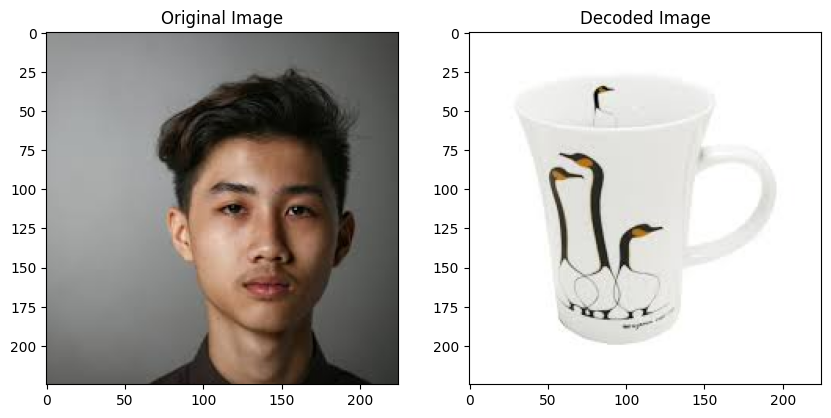

In [30]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

from google.colab import drive
drive.mount("/content/drive", force_remount=True)


# Read the image file
with open('/content/drive/MyDrive/Colab Notebooks/mug.jpg', 'rb') as image_file:
    image_bytes = image_file.read()

# Encode the image content to base64
encoded_image = base64.b64encode(image_bytes)

# Decode the base64 string back to image
decoded_image_bytes = base64.b64decode(encoded_image)
decoded_pil_image = Image.open(io.BytesIO(decoded_image_bytes))

encoded_image_str = encoded_image.decode("utf-8")

print(chat.send_message(
      [encoded_image_str, """What image is shown here?"""],
      generation_config=generation_config,
      safety_settings=safety_settings
  ))

print("Base64 Encoded Image:")
print(encoded_image_str)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open('/content/drive/MyDrive/Colab Notebooks/Copy of Firsthumanface.jpg'))
axs[0].set_title('Original Image')
axs[1].imshow(decoded_pil_image)
axs[1].set_title('Decoded Image')
plt.show()

In [34]:

cats1 = Part.from_data(
    mime_type="image/png",
    data=base64.b64decode("/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEBAREBAPEBAQEBAQEA8QEA8QDw8PFREWFxUSFRUYHCggGBonGxUTITEhJSkrLi4uFx8zODUtNyotOisBCgoKDg0OFRAQFSsdFSA3LS0tNy03KzcrMS0yLS01LS0rKzAtMDEuLS0tOC0rKystOCsrLSstLisyKzcrKyswK//AABEIAOEA4QMBIgACEQEDEQH/xAAbAAEAAQUBAAAAAAAAAAAAAAAABAECAwUHBv/EAEEQAAIBAwEDCQUGBAQHAQAAAAABAgMEESEFEjEGEyJBUWFxgZEHFDKhsUJScqLB0SNikvAlM3PCU4KjsrPi8RX/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EAB0RAQEAAgMBAQEAAAAAAAAAAAABAhEDITFBEjL/2gAMAwEAAhEDEQA/AO4gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFrmgLgY3WRbz6AzAw+8Io7hAZwR/eCvvAGcGDny5VkBlBYqiLwAAAAAAAAAAAAAAAAAAAAFlWWEAlNIxyrGJstILnNlrZQoAbLZSxq3hLVvqSKmC8pb9OpD70JR9YtAc/ly+vLuUpbLtIV6VOq4PnedUq8VxlCS6MM9Wc9+OB7bZN9WqxzWtals8J4nUo1MvszCTPI+xKp/hNOHB0q9xCXjv73+5HvcmMZZbu7W2ddKjJaDaLslclmRkDIpMvjWZhyMgTIVzMnk16ZJoPXxRRIAAAAAAAAAAAAAAAALK0cp44rUvAEGMk+HoGYbmG7J+qEar8fEgystbLecXWseBXo/e9UALZvRldzskvmY6tCTTScdU1x7gNdsfY1K1pqNCMae8oupFLozqKKTqNfeeFl9eDYRk+tJdmHoy5Updi9UJUZvGi4/eiAKt54leZl/L/UhzL7Y+r/YC3IyXc0uuS8kMQXW36ICmS6Kb4DnEuEV56lJVW+sC94XHXuRKtNU5Pr4eCIGM472bSEcJLsQguABQAAAAAAAAAAAAAAABE2hDRPs0IUTa1oZi13fM1KJQZQqzS3fKezo1XSrVuZmnhOrCpTpz0z0JySjLj1MityMs81ecutm0pKErqEm+unGdWK8ZQTRudnbSoXMN+hVhVh96Ek8PsfY/ECZvMrktARUAAVKlpUKqJcAHxQEm0hlru1J5o1eONRQTxmOX/fmbSm21q/VliJAML8V6lM95RnBhVRrv+pljLPACoAAAAAAAAAAAAAaq5jib8c+ptSBtGOqfasehKNfeXdOlFzqzhTguMpyUYrzZDp3NpewlGMqFzT4SjmFWPmtTxntIuM3drSnB1KTpPdglvZqTm45S630YrzZpLbkvfUa8a1gqlKouKmnGGHxTclhruZwy5pjn+bPXXHjtxuUre7c9m1u5urbQaXXb7zUM9sf2yea2jQls7+LTjUtay0hKMZKM31Qn9mSfYz3VpcbcS/iW+z6nhXq0m/yyRO5TQVbZ1xzsNzNvOUoSw3CajnitG01xRjk4f1lM5lZr58ax5dY3H8y7RuQ/KyG0aTylC4p4VWmno88Jx/lfyPTHC/ZTVktp01HOJ0qsZ/h3d76xid0PS4KlShUAVKFQqoXF9wQj1+IGCNDpuXXwJ9KhN93iS6NBR6svtMpdIiq1fXIO2fVIlAuhBlvR4l9Krh93X+5KlFNYZrai3ZNEGzBhtZ5j4aGYoAAAAAAAAAAARr+PRz2MkmO4jmMvBgcy9ptJ0/crtL/IrpS8G1NfODX/ADHsqNVTjGcXmMoqUX2prKNdyt2d7zY3FJLMnTcof6kOlH5rHman2abT5+whFvMqEnRf4VrD8rS8jH1fj1R5f2k3TpbNuGuM1Gn/AFySfyyeoPFe1x/4bL/Wo/8AcMvCPI+xmz3ruvV6qVBRXjUn+0H6nYzmXsTgubvJdbqUo+Si2vqzppUCoRUAVRQqgq5F9ssuP4iwzWa6UfMDYgA0gAABq9oS6fkjaGjrz35t9+ngSjYbPfxeX6kwi7Pj0W+1/QlFgAAAAAAAAAAAUZUAahr5No5l7Ppe77S2hacI705QX4KjUfyyXodSrxxKXizlNV8zyl7FW3fzW6/WJjJY6YeR9qdHe2ZW/llSn6VF+5680/K6z56xu6fFyoVN1fzJZXzSGXhHiPYlVW5eR61OlLycZL/adPOOexa7xdXFPP8AmUFNd7pz/wDdnYyoFSBtjbFvZ03VuKkacOCzrKT+7GK1k+5Hhds+0S6WXbWWKfVOs96bXbzcHp6mcs8cdbumpjb5HSipzfk77UFUW5cW9Z186K1puopr8LeU/U91sfaEriLlK3uLbDSjG4VOMprHxJRk8eDwzW0bAkWK6Xl+pgJNiuPgiiYACoAEe4ud3Rav5IDHtCvhbq4vj3I19KnqZGs6viS7Oj9p9XAglUobqS7C8AoAAAAAAAAAAAAAIN4uk+/ByflRHd5Q2bX2o0H+apH9Drd6uHgcr5WJf/vWHdCj/wCSqYy8WOiFJxymnwaw/AuBUcJ5FP3TbUKT0SrV7Z+HSUfmondThfL+DtNsSrL/AIlC6j5Yb+cJHcYzUoJrhKOV4NEnhXBdsXlfa+01CMtJ1ZUaEW3uUqSbzL0Tk/8A4dT2fyJhBJVbipVxxe5CGfTJy32brd2tbrslWX/Tmjv5z5OLDk6zm9OmHJlh/N0jWGz6VBbtKEYJ8Wl0peL4slIIqjpJJNTxi231cSrFaMiinJ8E35Ghs3JLi8GOVxFd/gQ919eQEZKldvuRhwXxg3wRJp2yWr1fyAwUaDer4E1LBUFAAAAAAAAAAAAAAAAEe8Wi8TyN/wAnYV61a4ljnk6Stqjz/C5rpJ+c3JPtR7C6XR80a3939TNgiWV3ziaacKkdKlN8YS/WL6n1kki31KMnHClzqT3ZwaUoLvb03c9TznseDA/eGt2c4Us6KpTjvZ8HLSMvFNAc/wDapsSrd3ltG2purV93qOcU4rFOM1httpLWTR7PkfeOez6EqicZ0qXNVYyTUo1KWYSTT4axNnY7Op0XKUd6VSeOcqze9UnjOMvqSy9FhLL0Ie0bbDnCOkbxqEsaYnu7s5LvdKLfjT7yTpa5byN2Jc211Y39eCjb3E5YnnWnzsJKm6i+ypOSx4rOGdrRjlRi47jjFwa3XFpOLj2Y7CyFqo/DKpFLqUt5eSlnHkXXYkIuRHjCouE1NdkopP8AqWnyM1KWUn2+vgBkRdChJ8EWx4mySKiJG0fW19TNC2iu/wATMCiiRUAAAAAAAAAAAAAAAAAAAAMdx8MvDPoapvXx+pt5rKa7U0eer1cLDajn4Jy+FS6k/wC9SUZV8b74xx5N5+q9S+UU009U9GabZXKCjdRzFuE4zlScakZRiq0XiUFPG7PXsbNiryLWmXLLXN/a3lxT7PHgQZbeTw0+MW457ex+jRG2jHLj204zqx/HHdx8nJeZIt6biuk8ybcpNcMvqXctF5EXa8pRinBZk1KmktXif2kuvdwpPuTA2EZZSa4PVeBcY6WN2O7wSSXhjQyIA3hCisR9X6vP6mLeU24p5UWt/H3tGo/Rvy7TNKaWF1vglxYVkhxRsjWw+KPivqbIsQABQAAAAAAAAAAAAAAAAAAAAADz1XDc4tJrenFprKay1ho9CavaOz25c5T+J434cN7Giku/Gnfp2Eo0lpsWhRo1aNGlGNKq5ydJ5dLeksNKL4R04I5/R2TtOwpUVSp13X94xc3NCULmFW1b0zCp096K4dHt7TpkZdTymuKejRepEHi+XO0q9tayr219UjUi4rmZ0qEnUy0mkubUk+vs0N5yXqU1b051LqNzWqQUqleU4ayay4xS0hFcMJLhrqbpMpuLsXogPNcsOUDtaLnZyhVud6KVvGEq/OJvpPdpvMWll57idtWxq17KpzcqzuKlHNOXO1LaUaso6NqLW4k3qsZ0xqyTVq3arbsKVDmOj/EdSSml9pbiX6lsI3k3iU6dFJLelThzm+3vaRc+GOi8446a6gYeS2zrm2tqVGvOiubh0nSU5SlLOZTlUnxbbbfR6zaW9xGTlGl0sfFU1cd7s3n8T/YtoWSjlylUquUXF85LMXFvhuLEfPBNpxb0S8kBksKOGtW3lybfFv8Av6GyMVvS3V3viZSwAAUAAAAAAAAAAAAAAAAAAAAAAAAYLm0hU+Ja9UlpJGunsua+GUZLv6L/AGNwANDK3qLjCXkt76Fm8ehBNDQxy+Cb8E2Z4W839l+en1NuBoQaVj95+S/cmU6aisJYLgUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB//2Q=="))

print(chat.send_message(
      [cats1, """What image is shown here?"""],
      generation_config=generation_config,
      safety_settings=safety_settings
  ))




candidates {
  content {
    role: "model"
    parts {
      text: "The image shows a white ceramic mug with a design of four geese on it. The geese are stylized with black necks and white bodies, and have orange beaks and eyes. The mug is a classic shape with a wide handle.  The words \"Wayne Reid\" are printed in small lettering at the bottom of the mug. \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.04543721675872803
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.10762491822242737
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.039713259786367416
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.06255973130464554
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.037326887249946594
    severity: HARM_SEVERITY_NEGLIGIBLE
   

In [36]:
print(chat.send_message(
      [cats1, """What ou label this iamge as?"""],
      generation_config=generation_config,
      safety_settings=safety_settings
  ))


candidates {
  content {
    role: "model"
    parts {
      text: "This image could be labeled as:\n\n* **\"Geese Mug\"** -  A simple and descriptive label.\n* **\"Wayne Reid Geese Mug\"** -  Includes the artist\'s name for more specific identification.\n* **\"Ceramic Mug with Geese Design\"** -  Highlights the material and design.\n* **\"Canadian Wildlife Mug\"** -  If the geese are Canadian geese, it adds a thematic label.\n\nUltimately, the best label depends on the context and what information is most important to convey. \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.0634823590517044
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.07654563337564468
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.06644792854785919
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.1175721287727356
  }
 

In [37]:
response = chat.send_message("Can you create a mug cat short story?")
print(response.text)

Bartholomew the cat was a creature of routine. Every morning, he'd wake Agnes with a gentle nudge, demanding breakfast. After his tuna, he'd settle on the windowsill, surveying the garden with his emerald eyes. It was a peaceful life, until the day Agnes brought home a new mug. 

It was a simple white mug, but on its side, a family of geese strutted, their black necks and white bodies painted with a simple grace that Bartholomew found strangely captivating.  He'd never seen anything like it. 

Bartholomew, known for his aloof nature, began spending an inordinate amount of time near the mug. He'd bat at it with his paw, try to lick the geese, even attempt to climb inside, much to Agnes' amusement. The mug, once merely a vessel for tea, had become a new obsession for the cat.

One day, Agnes, noticing Bartholomew's unwavering interest, took the mug outside. She carefully placed it on the ground beneath the gnarled oak tree, where Bartholomew often observed the real geese that frequented 

In [39]:
response = chat.send_message([cats1, "What colors are in the image?"])
print(response.text)

The image contains the following colors:

* **White:**  The dominant color of the mug and the geese's bodies.
* **Black:** The geese's necks.
* **Orange:** The geese's beaks and eyes. 
* **Grey:** A very subtle grey shade is present in the background, likely due to the lighting. 

